# Integração numérica

Talvez as aplicações mais básicas de computadores na Física, mas também as mais importantes, seja o cálculo de integrais e derivadas. Estamos acostumados, neste ponto do curso, a calcular integrais com métodos analíticos. A maior parte das integrais, entretanto, não pode ser calculada desta forma. Precisamos calcular estas integrais numericamente. Vamos aprender aqui alguns métodos para calcular integrais. Note que calcularemos aqui integrais definidas, e o resultado de uma dada integral será um valor numérico.

Para calcular integrais numericamente, partimos da própria definição de integral,

$$
\int f(x)\,\mathrm{d}x = \lim_{\Delta x_i \to 0} \sum_i f(x_i) \Delta x_i,
$$

isto é, avaliamos a função a intervalos $\Delta x_i$ tão pequenos quanto possível. A Figura abaixo representa a integral da função $f(x) = x^2$, com valores variáveis de $\Delta x_i$. Veja que a área coberta pelos retâgulos vai se aproximando da área sob a curva, que é a integral de $f(x)$.

CC BY-SA 3.0 [IkamusumeFan](https://en.wikipedia.org/wiki/Integral#/media/File:Riemann_Integration_and_Darboux_Lower_Sums.gif)

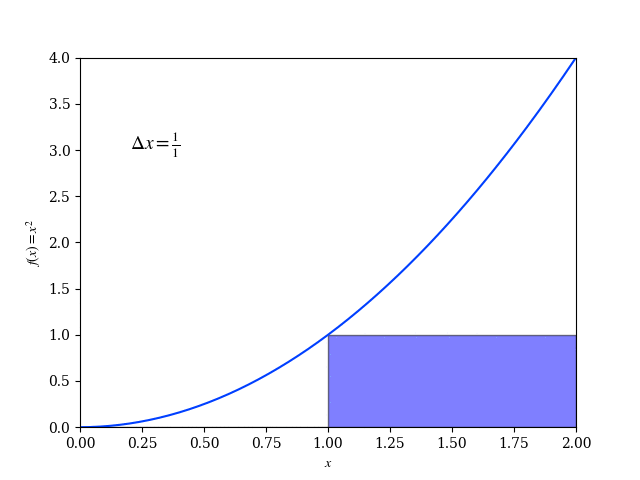

Antes de começar a programar, precisamos organizar o nosso formalismo. Primeiro, vamos quebrar a integral em várias partes menores.

$$
\int_a^b f(x)\,\mathrm{d}x = \sum_{i=0}^{N-1} \int_{x_i}^{x_{i+1}} f(x)\,\mathrm{d}x
$$

Aqui não há aproximação alguma, apenas usamos uma propriedade das integrais. Agora, o objetivo é, dado um número de intervalos $N$ grande, descobrir um meio de calcular as integrais da somatória à direita de forma aproximada. Em geral escolhemos um intervalo $\Delta x_i$ constante, que vamos chamar de $h$. Se os limites de integração são $a$ e $b$, temos que

\begin{align}
\Delta x_i &= h = \frac{b - a}{N} \\
x_i &= a + i h, \quad i = 0, 1, 2, \ldots, N-1.
\end{align}

Vamos começar com o método retangular.

## Regra retangular

O método da regra retangular é o mais simples de todos, e serve apenas como aprendizado para os métodos mais avançados.
Aqui nós vamos aproximar as integrais dos intervalos por um valor constante, que é o valor da função no ponto mais à esquerda do segmento, dado por $x_i = a + i h$. Podemos fazer simplesmente

\begin{align}
I = \int_a^b f(x)\,\mathrm{d}x \cong &\sum_{i=0}^{N-1} f(x_i) \Delta x_i \\
&\sum_{i=0}^{N-1} f(x_i) h = h \sum_{i=0}^{N-1} f(x_i)\\
\end{align}

Isto é exatamente o que aparece na animação acima. Usando este método, subestimamos ou sobreestimamos o valor da integral dos segmentos, dependendo da inclinação e da concavidade da curva. A integral, então, se resume a avaliar a função $f(x)$ por $N$ vezes, e somar os seus resultados. Podemos fazer este cálculo facilmente com o que já aprendemos de programação.

### Exercício 1

Vamos calcular a integral $I$ numericamente.

$$
I = \int_{0.1}^{1.0} \frac{\mathrm{d}x}{x} = \ln(x) \big|_{0.1}^{1.0} = - \ln(0.1).
$$

**a.** Definir o integrando como uma função python `f(x)`.

In [1]:
import numpy as np

In [2]:
def f(x):

    return 1/x

**b.** Defina os limites de integração como variáveis.

In [3]:
a = 0.1
b = 1

**c.** É muito importante ver como é o integrando. Faça o gráfico de `f(x)`.

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

Text(0, 0.5, '$f (x) = 1/x$')

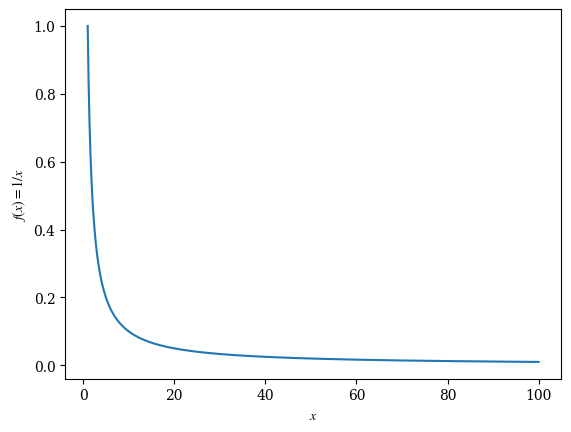

In [9]:
fig, ax = plt.subplots(1,1)

x = np.linspace(1,100,1000)
ax.plot(x,f(x))
ax.set_xlabel("$x$")
ax.set_ylabel("$f (x) = 1/x$")

### Exercício 1

Vamos calcular a integral $I$ numericamente.

$$
I = \int_{0.1}^{1.0} \frac{\mathrm{d}x}{x} = \ln(x) \big|_{0.1}^{1.0} = - \ln(0.1).
$$

In [ ]:
def f(x):
    return 1/x

**d.** Calcule numericamente a integral, com $N = 5$.

In [13]:
N = 5
h = (b - a)/N

S = 0
for i in range(N):
    S += f(a + i*h)

ii = S*h
print(ii)

3.3349236858051814


**e.** Compare o resultado com o valor analítico, calcule o erro percentual.

In [16]:
xl = -np.log(0.1)
print(f"valor analítico = {xl}")

E = np.abs((xl - ii)/xl)*100
print(f"Erro = {E:.2f}")

valor analítico = 2.3025850929940455
Erro = 44.83


**f.** Calcule a integral para $N = 5, 10, 100, 1000$, e mostre o erro percentual.

In [26]:
def integral_ret(func,a,b,N):
    h = (b-a)/N

    Soma = 0
    for i in range(N):
        Soma += func(a + i*h)

    integral = Soma * h

    return integral

N = np.array([5,10,100,1000])
II = np.zeros(len(N))
E = np.zeros(len(N))

for k in range(len(N)):
    II[k] = integral_ret(f,a,b,N[k])
    E[k] = np.abs((xl - II[k])/xl)*100

for x in range(len(II)):
    print(f"Integral = {II[x]} | Erro = {E[x]}")

Integral = 3.3349236858051814 | Erro = 44.83389543136444
Integral = 2.7702144304424885 | Erro = 20.308884082993252
Integral = 2.343752798389934 | Erro = 1.787890728605312
Integral = 2.3066417754393744 | Erro = 0.17617948008401635


**g.** Se tudo deu certo, os valores da integral numérica parecem _convergir_ para o valor analítico, conforme se aumenta o número de segmentos $N$. Faça o gráfico do valor integral em função de $N$, com $N$ indo de $10$ até $1000$. Use uma escala logarítmica no eixo $x$.

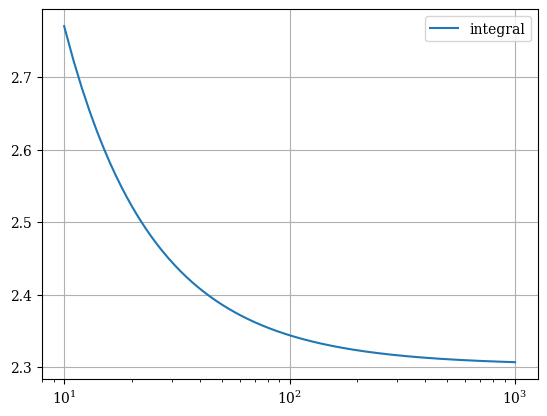

In [48]:
fig, ax = plt.subplots(1,1)

N = np.arange(10,1001,1)

II = np.zeros(len(N))
E = np.zeros(len(N))

for i in range(len(N)):

    II[i] = integral_ret(f,a,b,N[i])
    E[i] = (np.abs((xl-II[i])/xl)*100)

ax.plot(N,II, label = "integral")
#ax.plot(N,E, label = "erro")
ax.set_xscale('log')
ax.legend()
ax.grid()

## Regra do trapézio

A aproximação feita acima é bastante simplória. Podemos tomar proveito do fato de que a integral é a área sob a curva para encontrar uma forma melhor de cobrir a área dos segmentos. Veja a figura abaixo, onde não usamos um retângulo e sim um trapézio para aproximar a área.

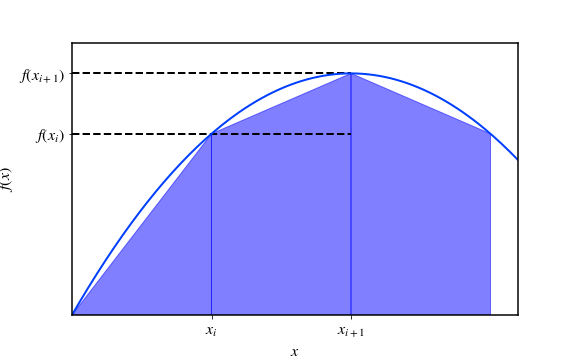

Chamamos esta abordagem de regra do trapézio. Nesta figura, $p$ é a largura do segmento, o nosso $h$. É esperado que este método seja mais preciso do que a regra retangular, isto é, ele deve convergir mais rapidamente ao valor correto da integral.

Precisamos então calcular a área de cada trapézio. A primeira vista, parece que precisamos calcular a função $f(x)$ duas vezes para o mesmo segmento. Porém, veja que um mesmo valor $f(x_i)$ é usado como lado direito de um segmento, e lado esquerdo de outro! Assim, se formos espertos, podemos ter um resultado melhor que o método retangular, e calculando a função o mesmo número de vezes.

Pois bem, vamos calcular a área do trapézio que se aproxima da integral de um segmento, conforme a figura. Note que a área pode ser dividida em um retângulo ($h f(x_i)$, igual ao método anterior) mais um pequeno triângulo na parte de cima. Assim,

\begin{align}
\int_{x_i}^{x_{i+1}} f(x)\,\mathrm{d}x &\cong h f(x_i) + \frac{1}{2} h \left(f(x_{i+1}) - f(x_i)\right) \\
&\cong \frac{1}{2} h \left( f(x_{i+1}) + f(x_i) \right)
\end{align}

Ou seja, isto é equivalente a um retângulo cuja altura é a média dos valores de $f(x)$ nos extremos do segmento. Calculando o valor total da integral,

$$
I = \int_a^b f(x)\,\mathrm{d}x \cong \frac{1}{2} h \sum_{i=0}^{N-1} \left( f(x_{i+1}) + f(x_i) \right)
$$

Quebrando a soma em duas,

$$
I \cong \frac{1}{2} h \left[\sum_{i=0}^{N-1} f(x_{i+1}) + \sum_{i=0}^{N-1} f(x_i) \right]
$$

Repare que as somas são quase iguais, com exceção de que o termo à esquerda vai de $x_1$ até $x_N$, enquanto o termo à direita vai de $x_0$ até $x_{N-1}$. Podemos colocar as duas somas em termos de $x_i$ fazendo $j = i+1$ na primeira soma, e em seguida forçamos a mesma faixa de índices tirando alguns termos para fora do somatório.

\begin{align}
\sum_{i=0}^{N-1} f(x_{i+1}) &= \sum_{j=1}^{N} f(x_{j}) = f(x_N) + \sum_{j=1}^{N-1} f(x_j) \\
\sum_{i=0}^{N-1} f(x_i) &= f(x_0) + \sum_{i=1}^{N-1} f(x_i)
\end{align}

Como o índice dos somatórios são independentes, podemos trocar $j$ por $i$ sem problema. Também, dado que $x_i = a + i h$ e $h = (b - a) / N$, é fácil ver que $x_0 = a$ e $x_N = b$. Assim,

$$
I \cong \frac{1}{2} h \left[f(a) + f(b) + 2 \sum_{i=1}^{N-1} f(x_i) \right]
$$

Finalmente,

$$
I = \int_a^b f(x)\,\mathrm{d}x \cong h \left[\frac{f(a) + f(b)}{2} + \sum_{i=1}^{N-1} f(x_i) \right]
$$

Esta fórmula é muito parecida com a regra retangular. Veja, porém, que a somatória começa em 1 e não em zero. Podemos então calcular a integral usando a regra do trapézio fazendo poucas modificações ao código.

### Exercício 2

Vamos calcular a mesma função anterior e comparar as regras do retângulo e do trapézio.

$$
I = \int_{0.1}^{1.0} \frac{\mathrm{d}x}{x} = - \ln(0.1).
$$

**a.** Calcule a integral usando a regra do trapézio para $N = 5, 10, 100, 1000$, e mostre o erro percentual.

In [51]:
def integral_trap(func,a,b,N):
    h = (b - a)/N

    Soma = 0
    for i in range(N):
        Soma += func(a + i*h)

    Integral = h * ((0.5*f(a) + 0.5*f(b)) + Soma)

    return Integral

N = np.array([5,10,100,1000])
II1 = np.zeros(len(N))

for i in range(len(N)):
    II1[i] = integral_trap(f,a,b,N[i])

print(II1)

[4.32492369 3.26521443 2.3932528  2.31159178]


Se tudo deu certo, vemos que precisamos de menos segmentos do que a regra retangular para que o resultado se aproxime do valor analítico da integral.

**b.** Faça um gráfico da convergência do valor da integral comparando os resultados da regra retangular e do trapézio.

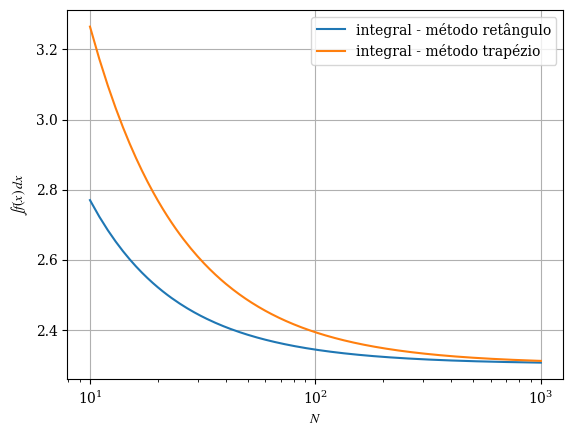

In [56]:
fig, ax = plt.subplots(1,1)

N = np.arange(10,1001,1)

II = np.zeros(len(N))
E = np.zeros(len(N))
II1 = np.zeros(len(N))

for i in range(len(N)):

    II[i] = integral_ret(f,a,b,N[i])
    E[i] = (np.abs((xl-II[i])/xl)*100)
    II1[i] = integral_trap(f,a,b,N[i])

ax.plot(N,II, label = "integral - método retângulo")
#ax.plot(N,E, label = "erro")
ax.plot(N,II1, label = "integral - método trapézio")
ax.set_xscale('log')
ax.legend()
ax.set_xlabel("$N$")
ax.set_ylabel("$\int f(x)\\, dx$")
ax.grid()

## Conclusão

Aprendemos a calcular integrais definidas usando métodos baseados nas regras retangular e do trapézio. A regra retangular tem valor apenas didático, por sua simplicidade. Por outro lado, a regra do trapézio é uma solução efetiva, e pode ser usado na maioria dos casos, inclusive quando o intervalo entre as amostras $h$ não é uniforme (com alguma modificação no programa).